In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [19]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [20]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


image of index1


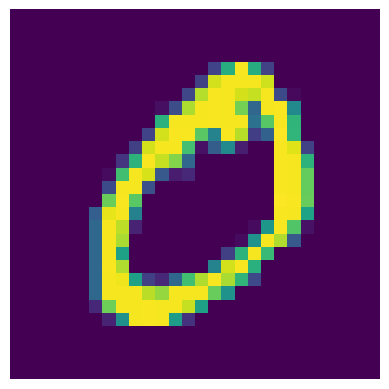

image of index2


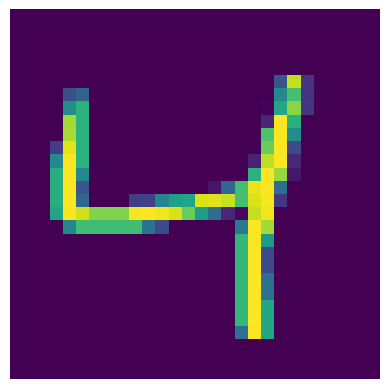

image of index3


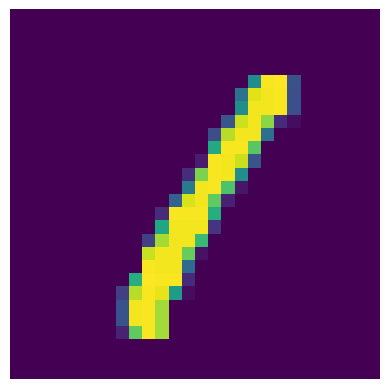

image of index4


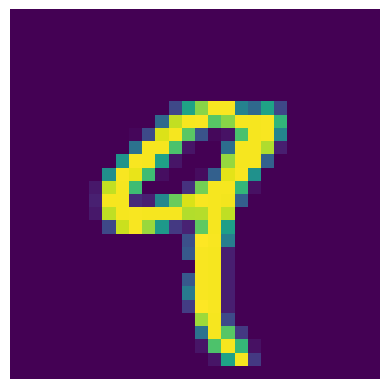

In [21]:
for i in range(1,5):
    plt.imshow(X_train[i])
    plt.axis('off')
    print(f"image of index{i}")
    plt.show()

In [22]:
np.unique(X_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [23]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [29]:
from tensorflow.keras import Sequential,layers
cnn=Sequential([
    layers.Conv2D(32,(2,2),activation='relu',input_shape=( 28, 28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])
    


In [30]:
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [31]:
history = cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8499 - loss: 0.4775
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9773 - loss: 0.0731
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9844 - loss: 0.0507
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9882 - loss: 0.0386
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9892 - loss: 0.0354
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9913 - loss: 0.0289
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9925 - loss: 0.0231
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9941 - loss: 0.0190
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9947 - loss: 0.0174
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9952 - loss: 0.0149


In [33]:
cnn.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 27, 27, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 12, 12, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 5, 5, 64)            │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,888 (491.75 KB)

 Trainable params: 41,962 (163.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 83,926 (327.84 KB)

In [39]:
loss,accuracy=cnn.evaluate(X_train_scaled, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9967 - loss: 0.0108


In [40]:
accuracy

0.9966166615486145

In [43]:
Y_pred=cnn.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [44]:
Y_pred[0]

array([8.7419350e-04, 1.0651491e-01, 9.4322860e-01, 6.7801213e-01,
       4.5564830e-06, 1.6632073e-05, 1.6990244e-11, 9.9999893e-01,
       5.3063934e-03, 1.5495010e-01], dtype=float32)

In [45]:
np.argmax(Y_pred[0])

7

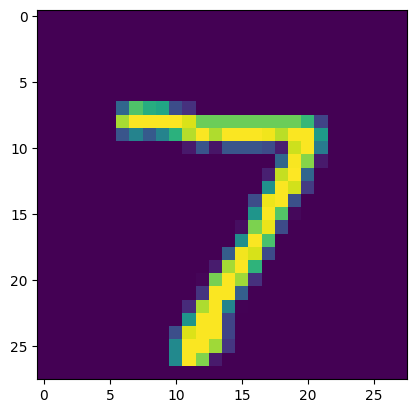

In [46]:
plt.imshow(X_test_scaled[0])

In [52]:
prediction=[np.argmax(i) for i in Y_pred]
prediction

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [57]:
from tensorflow.math import confusion_matrix
cnf=confusion_matrix(y_test,prediction)
cnf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    1,    1,    0,    1,    0,    5,    3,    0,    2],
       [   0, 1133,    1,    0,    0,    0,    1,    0,    0,    0],
       [   2,    1, 1021,    0,    1,    0,    0,    7,    0,    0],
       [   0,    2,    2,  999,    0,    5,    0,    0,    1,    1],
       [   0,    1,    3,    0,  958,    0,    0,    1,    1,   18],
       [   0,    2,    1,    5,    0,  872,    2,    2,    3,    5],
       [   1,    5,    1,    0,    1,    1,  948,    0,    1,    0],
       [   0,    2,    4,    1,    0,    0,    0, 1016,    0,    5],
       [   1,    0,    2,    0,    0,    1,    1,    0,  965,    4],
       [   1,    0,    0,    0,    2,    3,    1,    2,    0, 1000]])>

Text(0.5, 80.7222222222222, 'prediction')

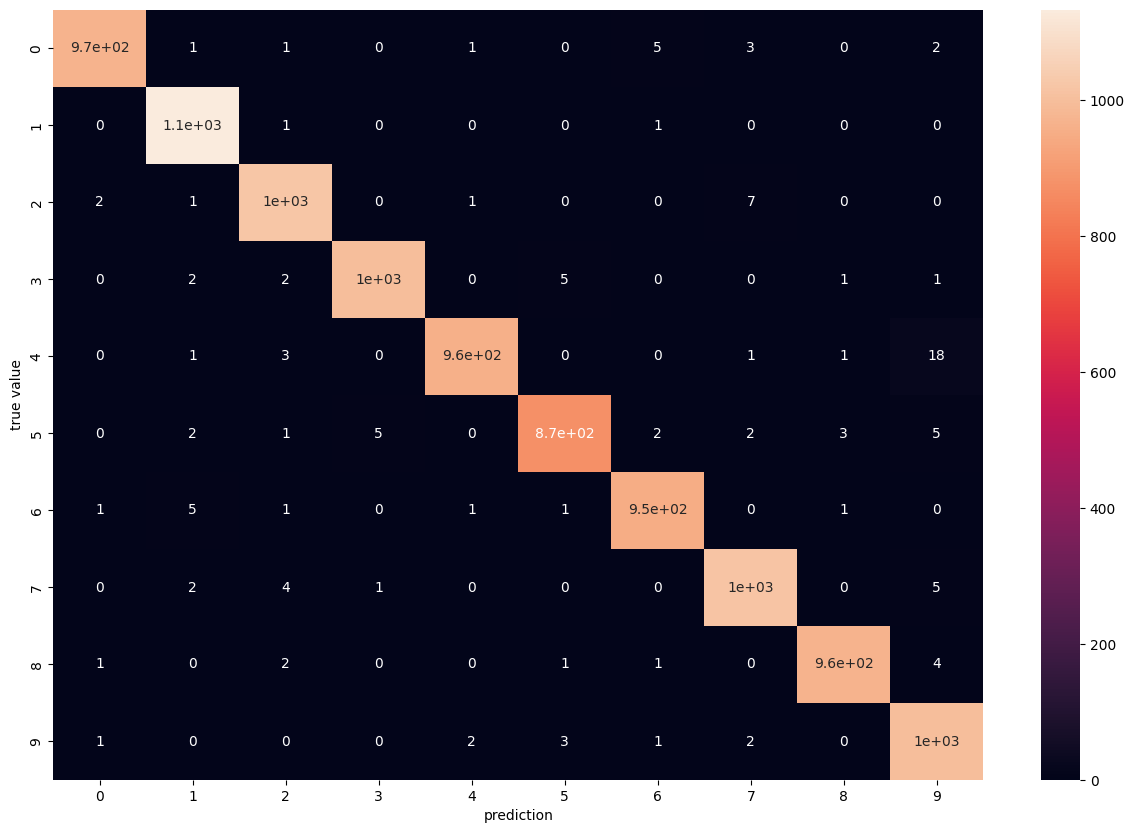

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(cnf,annot=True)
plt.ylabel('true value')
plt.xlabel("prediction")